In [1]:
import pandas as pd
import numpy as np
#visual packages
import matplotlib.pyplot as plt
import seaborn as sns
#packages for model evaluation
pd.options.mode.chained_assignment = None
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
#read in data from local github
data = pd.read_csv('https://raw.githubusercontent.com/simonswlin/water-potability-DT-analysis/main/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data Analysis

In [86]:
data.shape

(3276, 10)

In [87]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [89]:
data.describe() 
#can see which input variables have NaN values 
#pH, Sulfate and Trihalomethanes have NaN values

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [91]:
#need to make sure we know that data set is not biased/heavily skewed for a certain potability result
#slightly biased/skew towards non potable data
data["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

## Plotting distribution of class labels - water potability

Text(0, 0.5, 'Number of Instances')

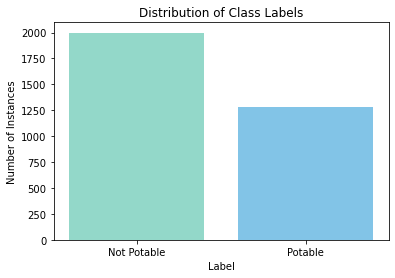

In [92]:
# Custom colors
color_non_potable = '#93d8c9' 
color_potable = '#82c4e7'

# Plot the distribution of class labels
plt.bar(
  ['Not Potable', 'Potable'],
  data['Potability'].value_counts(), 
  color=[color_non_potable, color_potable]
)
plt.title('Distribution of Class Labels')
plt.xlabel('Label')
plt.ylabel('Number of Instances')

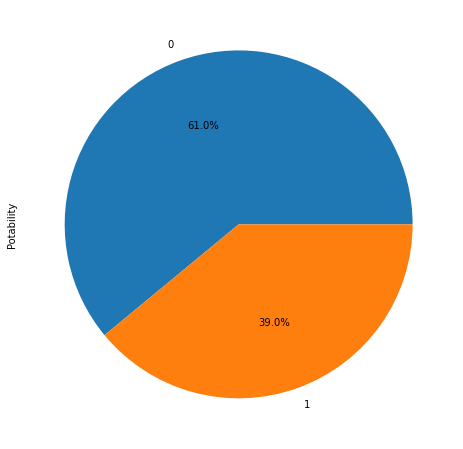

In [93]:
#Pie chart to show skew of potability
data["Potability"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(8,8));

## Distribution of features in data set

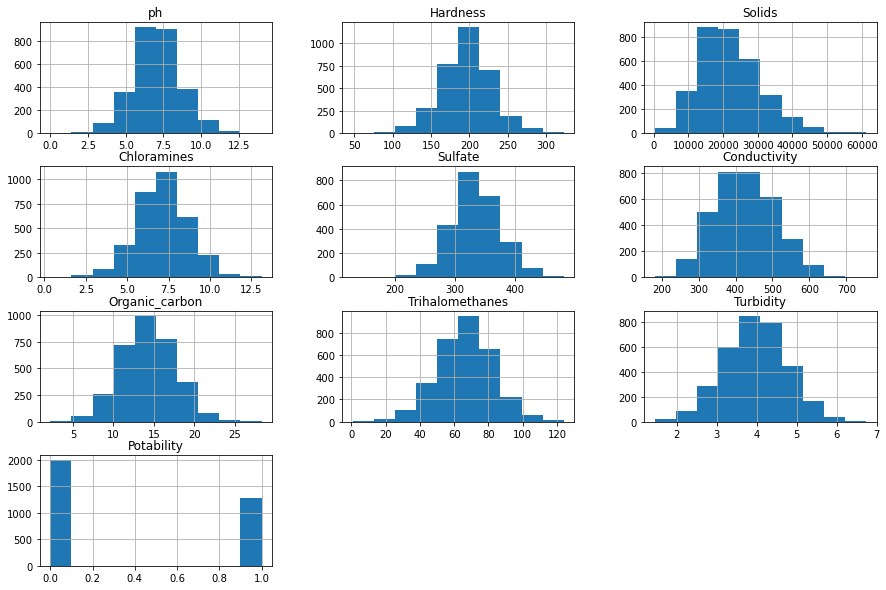

In [94]:
data.hist(figsize = (15,10))
plt.show()
#can see that all the input variables are normally distributed meaning that there should be no bias in the data set

#all input variables being normally distributed is also very hard to obtain in a real world environment
#might cause concern for how real the data is
#as such this data set would only be good for practicing machine learning models to understand the differences
#between working with real data vs working with fake data

## Plotting distribution of features relative to water potability

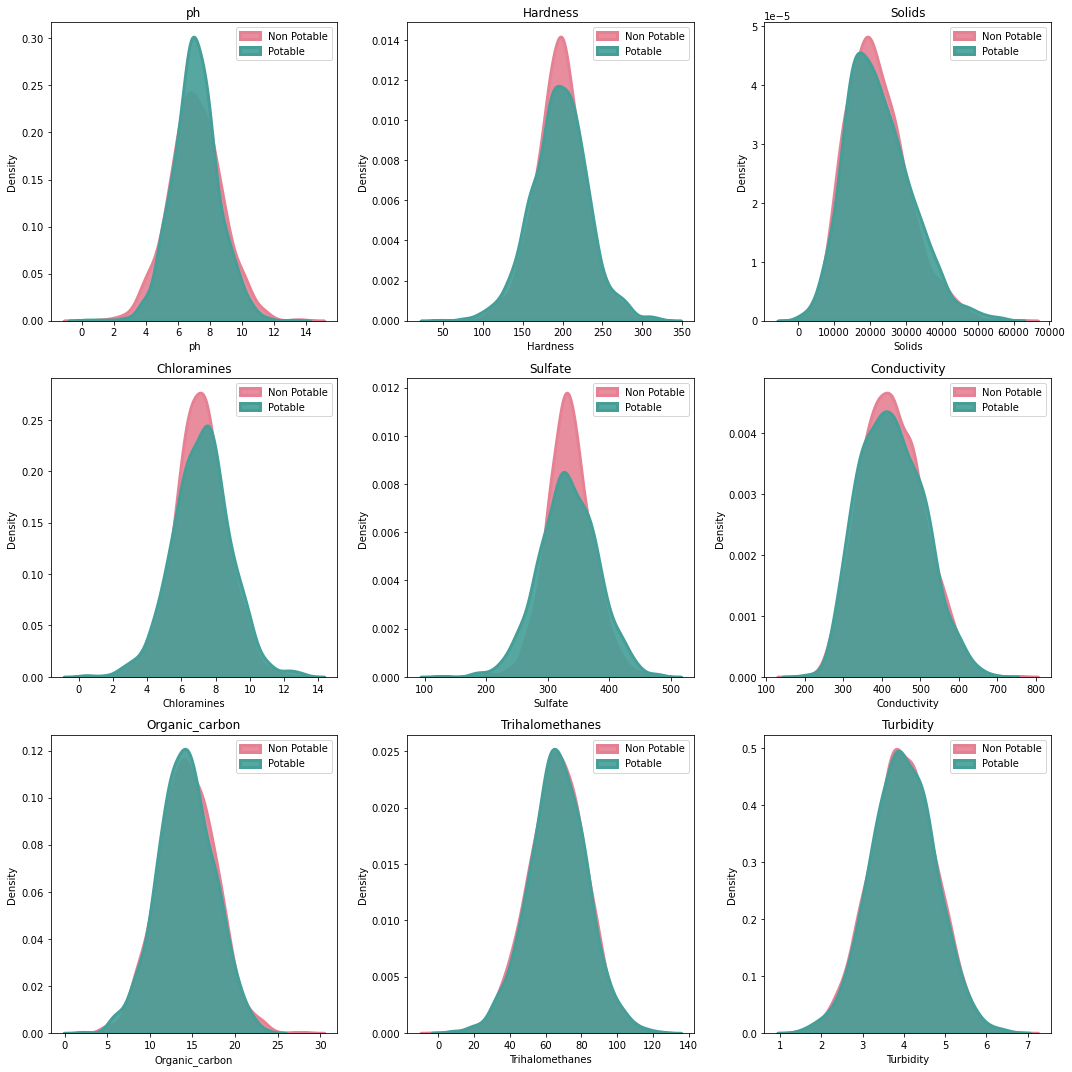

In [95]:
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(data.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    plotting = sns.kdeplot(x = non_potable[col], label = "Non Potable",fill=True, common_norm=False, color="#E68193",alpha=.9, linewidth=3)
    plotting = sns.kdeplot(x = potable[col], label = "Potable",fill=True, common_norm=False, color="#459E97",alpha=.9, linewidth=3)
    plt.legend()
plt.tight_layout()

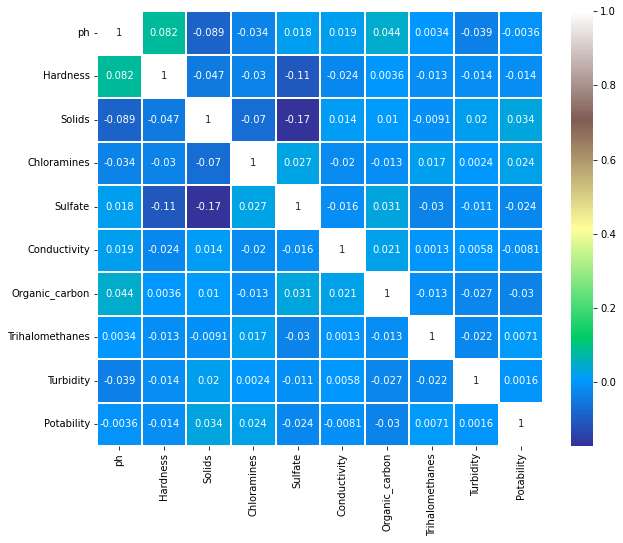

In [96]:
#correlation heatmap between input variables and class label
sns.heatmap(data.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
#there is little correlation between variables

# Pre-processing - split data set into features and target variable

In [97]:
#splitting input data with target variable
X = data.drop('Potability', axis=1) #input data, axis 1 to remove the column
Y = data['Potability'] #target variable

# Split data set into train and test splits

In [98]:
from sklearn.model_selection import train_test_split
#test_size = 0.2 means that we do a 80% training 20% testing split on the data set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=123)

# Handling Missing Values

In [99]:
#Dealing with missing values 

#Sulfate nearly has 20% of its values missing
#To deal with it, can remove variable completely, but Sulfate might be important to determining water potability
#Also data set already very small, over 1000 NaN values as well
#Better to fill the missing data with mean of the columns with NaN values e.g.'Sulfate'

# handling the missing values with mean AFTER data is split, reasoning in report
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Model Training with a Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier
#decision tree trained with max_depth = None
dt = DecisionTreeClassifier(random_state = 123)

In [103]:
#fit a decision tree on the training data
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=123)

# Helper Function for Evaluating a Decision Tree Model

In [104]:
def evaluate_dtmodel(dt_classifier):
    print("Train Accuracy :", accuracy_score(Y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(Y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(Y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(Y_test, dt_classifier.predict(X_test)))

# Helper Function for Visualising Decision Trees

In [105]:
def dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Not Potable', "Potable"],
                       filled=True)
#where 0 is not potable and 1 is potable

# Evaluating model performance of decision tree by comparing training and testing accuracy

Train Accuracy : 1.0
Train Confusion Matrix:
[[1604    0]
 [   0 1016]]
--------------------------------------------------
Test Accuracy : 0.5716463414634146
Test Confusion Matrix:
[[253 141]
 [140 122]]


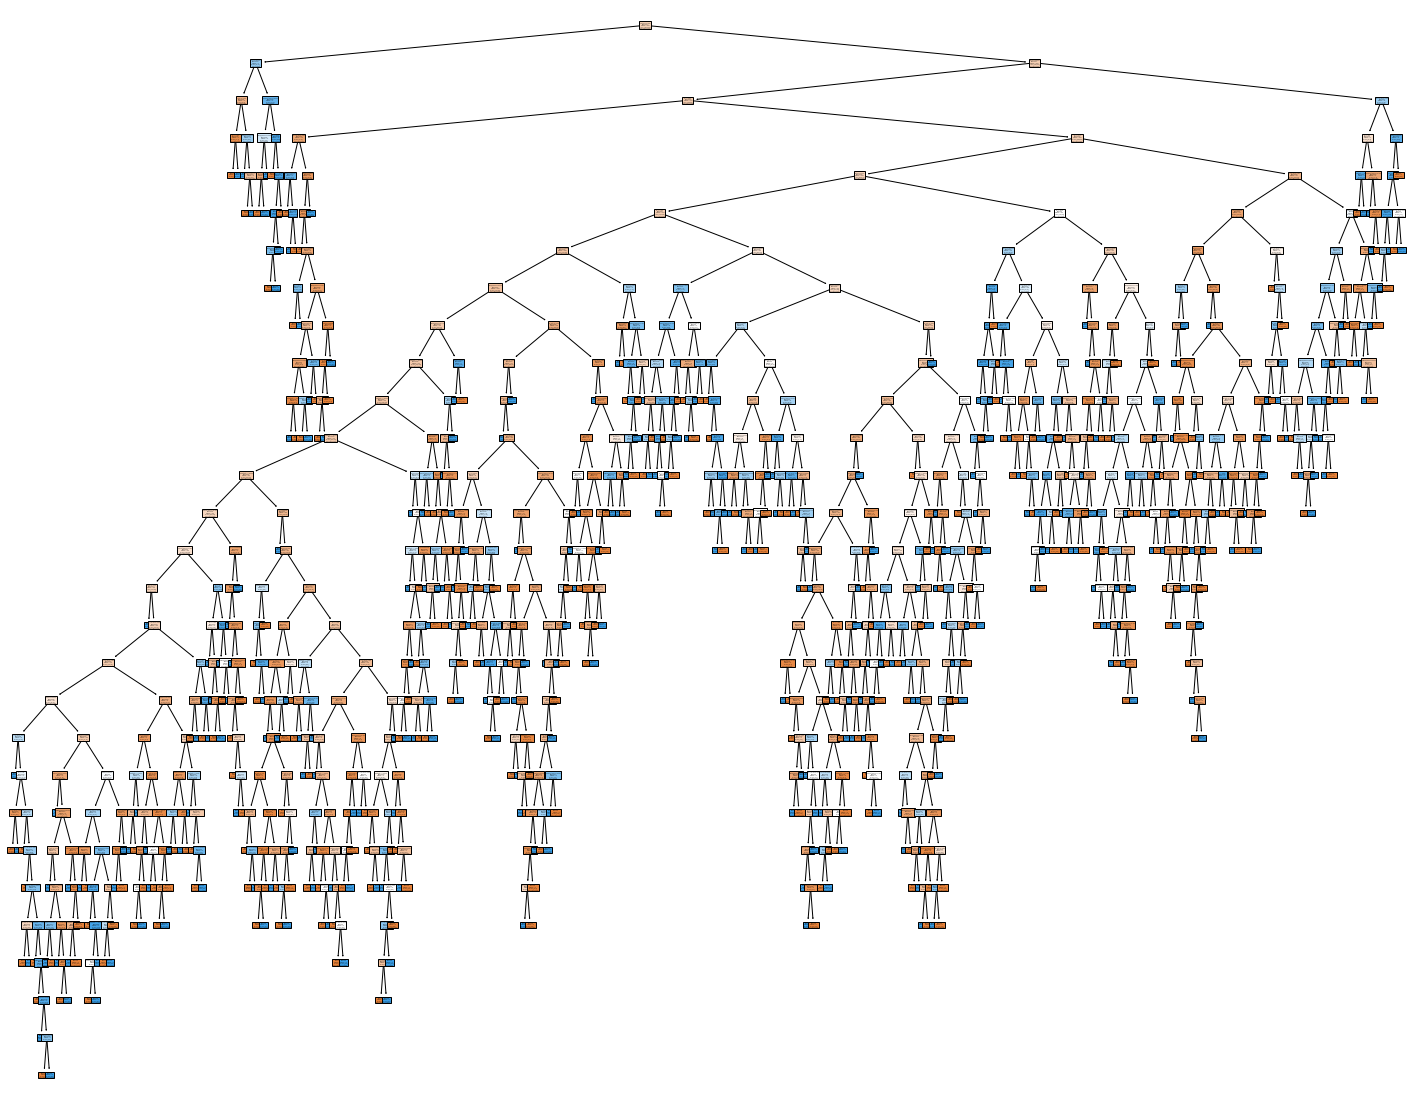

In [106]:
#evaluating decision tree with default hyper-parameters
#max_depth = None 
evaluate_dtmodel(dt)
#graph very computationally expensive without max_depth set
dt_graph(dt)

# Model Optimisation - Hyper-parameter Tuning

In [113]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV 10 fold for decision tree optimisation

## Optimising Decision Tree Performance

In [114]:
#criterion -  gini index or information gain to choose best ASM (attribute selection measure)
#splitter - either choose the best split or the best random split - ["best","random"]
#max_depth - int value or None
#when None, nodes expanded until all leaves contain less than min_sample_leaf samples
#High value of max_depth = overfitting
#Low value of max_depth = underfitting
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [117]:
#instantiate grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")
#n-jobs = -1, use all processors to run CV
#verbose = detailed print out while fitting data to GSCV

In [118]:
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [119]:
#scoring each model in grid search by accuracy score
score_df = pd.DataFrame(grid_search.cv_results_)
#just to confirm that both param criterion were being tested
#as well as all max depth and min samples leaf values
#by removing score_df.head()
score_df
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009133,0.002873,0.001561,0.000968,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.614504,0.625954,...,0.625954,0.618321,0.641221,0.610687,0.629771,0.614504,0.625954,0.624046,0.009072,23
1,0.005892,0.000839,0.001080,0.000326,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.614504,0.625954,...,0.625954,0.618321,0.641221,0.610687,0.629771,0.614504,0.625954,0.624046,0.009072,23
2,0.005426,0.000451,0.000963,0.000109,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.614504,0.625954,...,0.625954,0.618321,0.641221,0.610687,0.625954,0.618321,0.625954,0.624046,0.008577,22
3,0.005025,0.000291,0.001211,0.000642,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.610687,0.625954,...,0.625954,0.610687,0.629771,0.606870,0.629771,0.606870,0.599237,0.616794,0.010550,41
4,0.005215,0.000529,0.000995,0.000220,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.595420,0.625954,...,0.625954,0.618321,0.633588,0.614504,0.633588,0.606870,0.603053,0.620229,0.014708,34


In [120]:
#find model with highest accuracy after performing grid search on dt using training data
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=123)

In [121]:
dt_best = grid_search.best_estimator_

# Evaluating the best decision tree produced by GridSearchCV and plot

Train Accuracy : 0.6343511450381679
Train Confusion Matrix:
[[1544   60]
 [ 898  118]]
--------------------------------------------------
Test Accuracy : 0.6371951219512195
Test Confusion Matrix:
[[381  13]
 [225  37]]


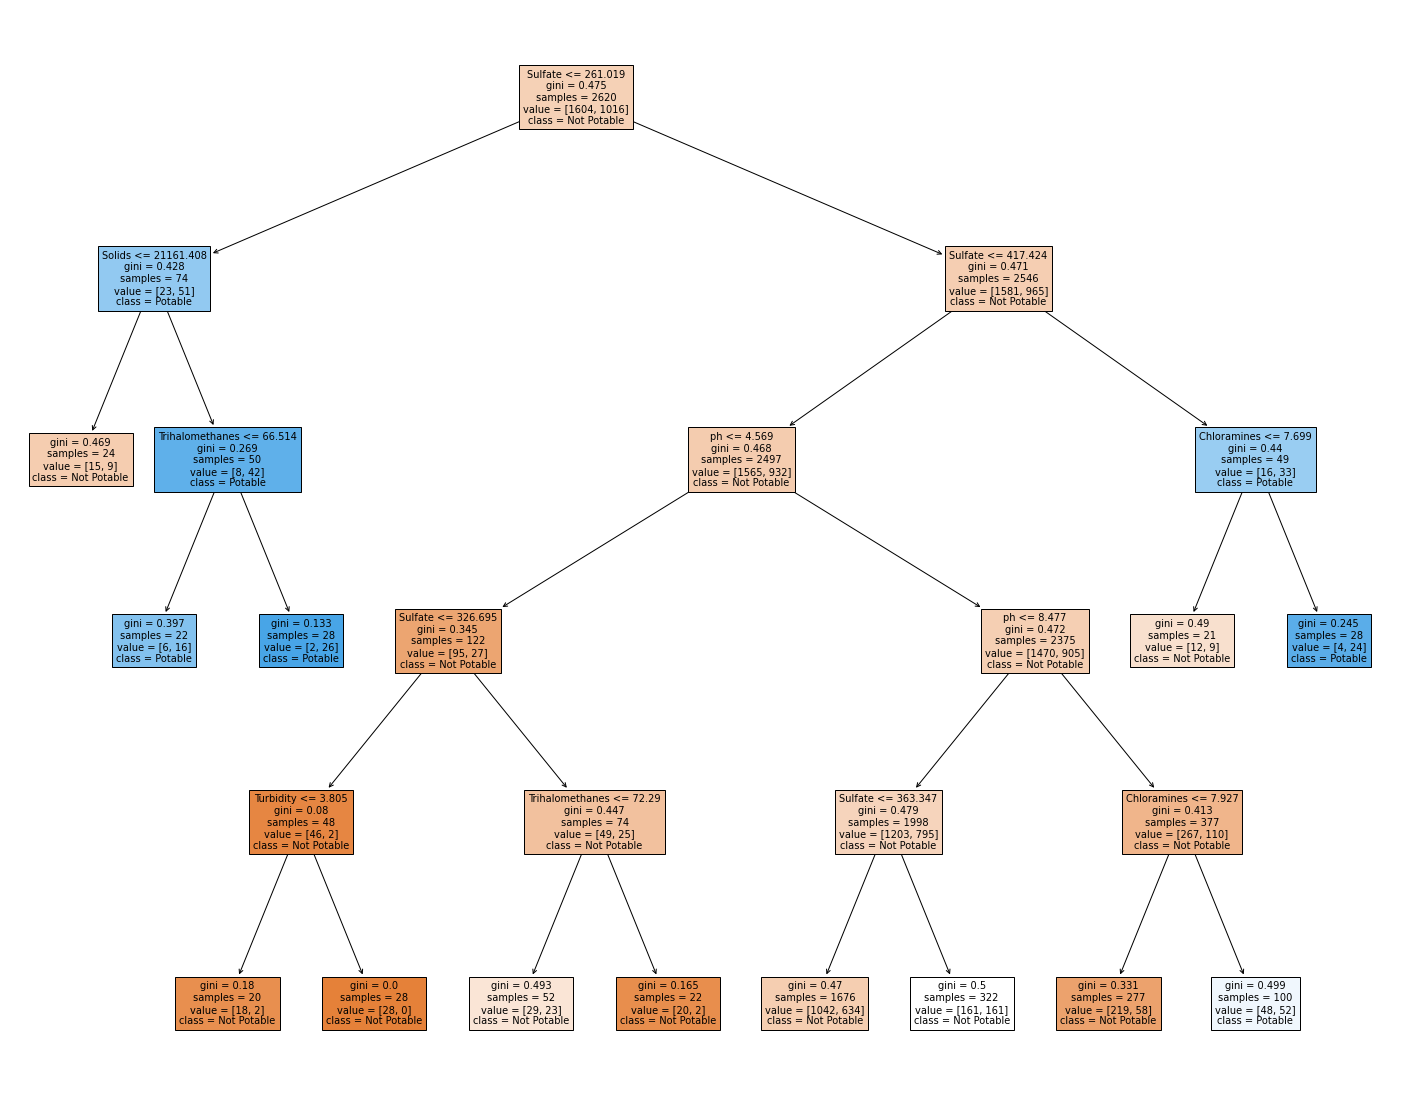

In [122]:
evaluate_dtmodel(dt_best)
dt_graph(dt_best)
#best dt model because of highest test accuracy produced after tuning hyper-parameters